In [1]:
from numpy import log, exp, linspace, ones, array, round
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,16)
from matplotlib import cm
import seaborn as sns

In [2]:
class BSM:
    
    def __init__(self, S, K, T, sig, r, q, type="c", calc=False):
        self.S, self.K, self.T, self.sig = S, K, T, sig
        self.r, self.q = r, q
        
        if type.lower() in ['c', 'p', "call", "put"]:
            self.type = type.lower()[0]
        else: raise ValueError(f"Option type must be c, call, p, or put, not {self.type}")
        
        self.d1 = self.calc_d1()
        self.d2 = self.calc_d2()
        
        if calc:
            self.V = self.calc_fair_value()
    
    def calc_d1(self):
        return (log(self.S/self.K)+(self.r-self.q+self.sig**2/2)*self.T)/(self.sig*self.T**0.5)
    
    def calc_d2(self):
        return self.d1 - self.sig*self.T**0.5
    
    def calc_fair_value(self):
        if self.type=='c':
            return self.S*exp(-self.q*self.T)*norm.cdf(self.d1) - self.K*exp(-self.r*self.T)*norm.cdf(self.d2)
        else:
            return self.K*exp(-self.r*self.T)*norm.cdf(-self.d2) - self.S*exp(-self.q*self.T)*norm.cdf(-self.d1)
    
    def calc_delta(self):
        if self.type=='c':
            return exp(-self.q*self.T)*norm.cdf(self.d1)
        else:
            return -exp(-self.q*self.T)*norm.cdf(-self.d1)
    
    def calc_gamma(self):
        return exp(-self.q*self.T)*norm.pdf(self.d1) / (self.S*self.sig*self.T**0.5)
    
    def calc_theta(self):
        if self.type=='c':
            return (-self.S*exp(-self.q*self.T)*norm.pdf(self.d1)*self.sig/(2*self.T**0.5) 
                    - self.r*self.K*exp(-self.r*self.T)*norm.cdf(self.d2) 
                    + self.q*self.S*exp(-self.q*self.T)*norm.cdf(self.d1))
        else:
            return (-self.S*exp(-self.q*self.T)*norm.pdf(self.d1)*self.sig/(2*self.T**0.5) 
                    + self.r*self.K*exp(-self.r*self.T)*norm.cdf(-self.d2) 
                    - self.q*self.S*exp(-self.q*self.T)*norm.cdf(-self.d1))
    
    def calc_vega(self):
        return self.S*exp(-self.q*self.T)*norm.pdf(self.d1)*self.T**0.5

In [3]:
S = 4450
K = 4460
T = 2/252
sig = 0.19
r = 0.01
q = 0

BSM(S, K, T, sig, r, q).calc_fair_value()

25.504561283506746

In [4]:
BSM(S, K, T, sig, r, q).calc_delta()

0.452455330774889

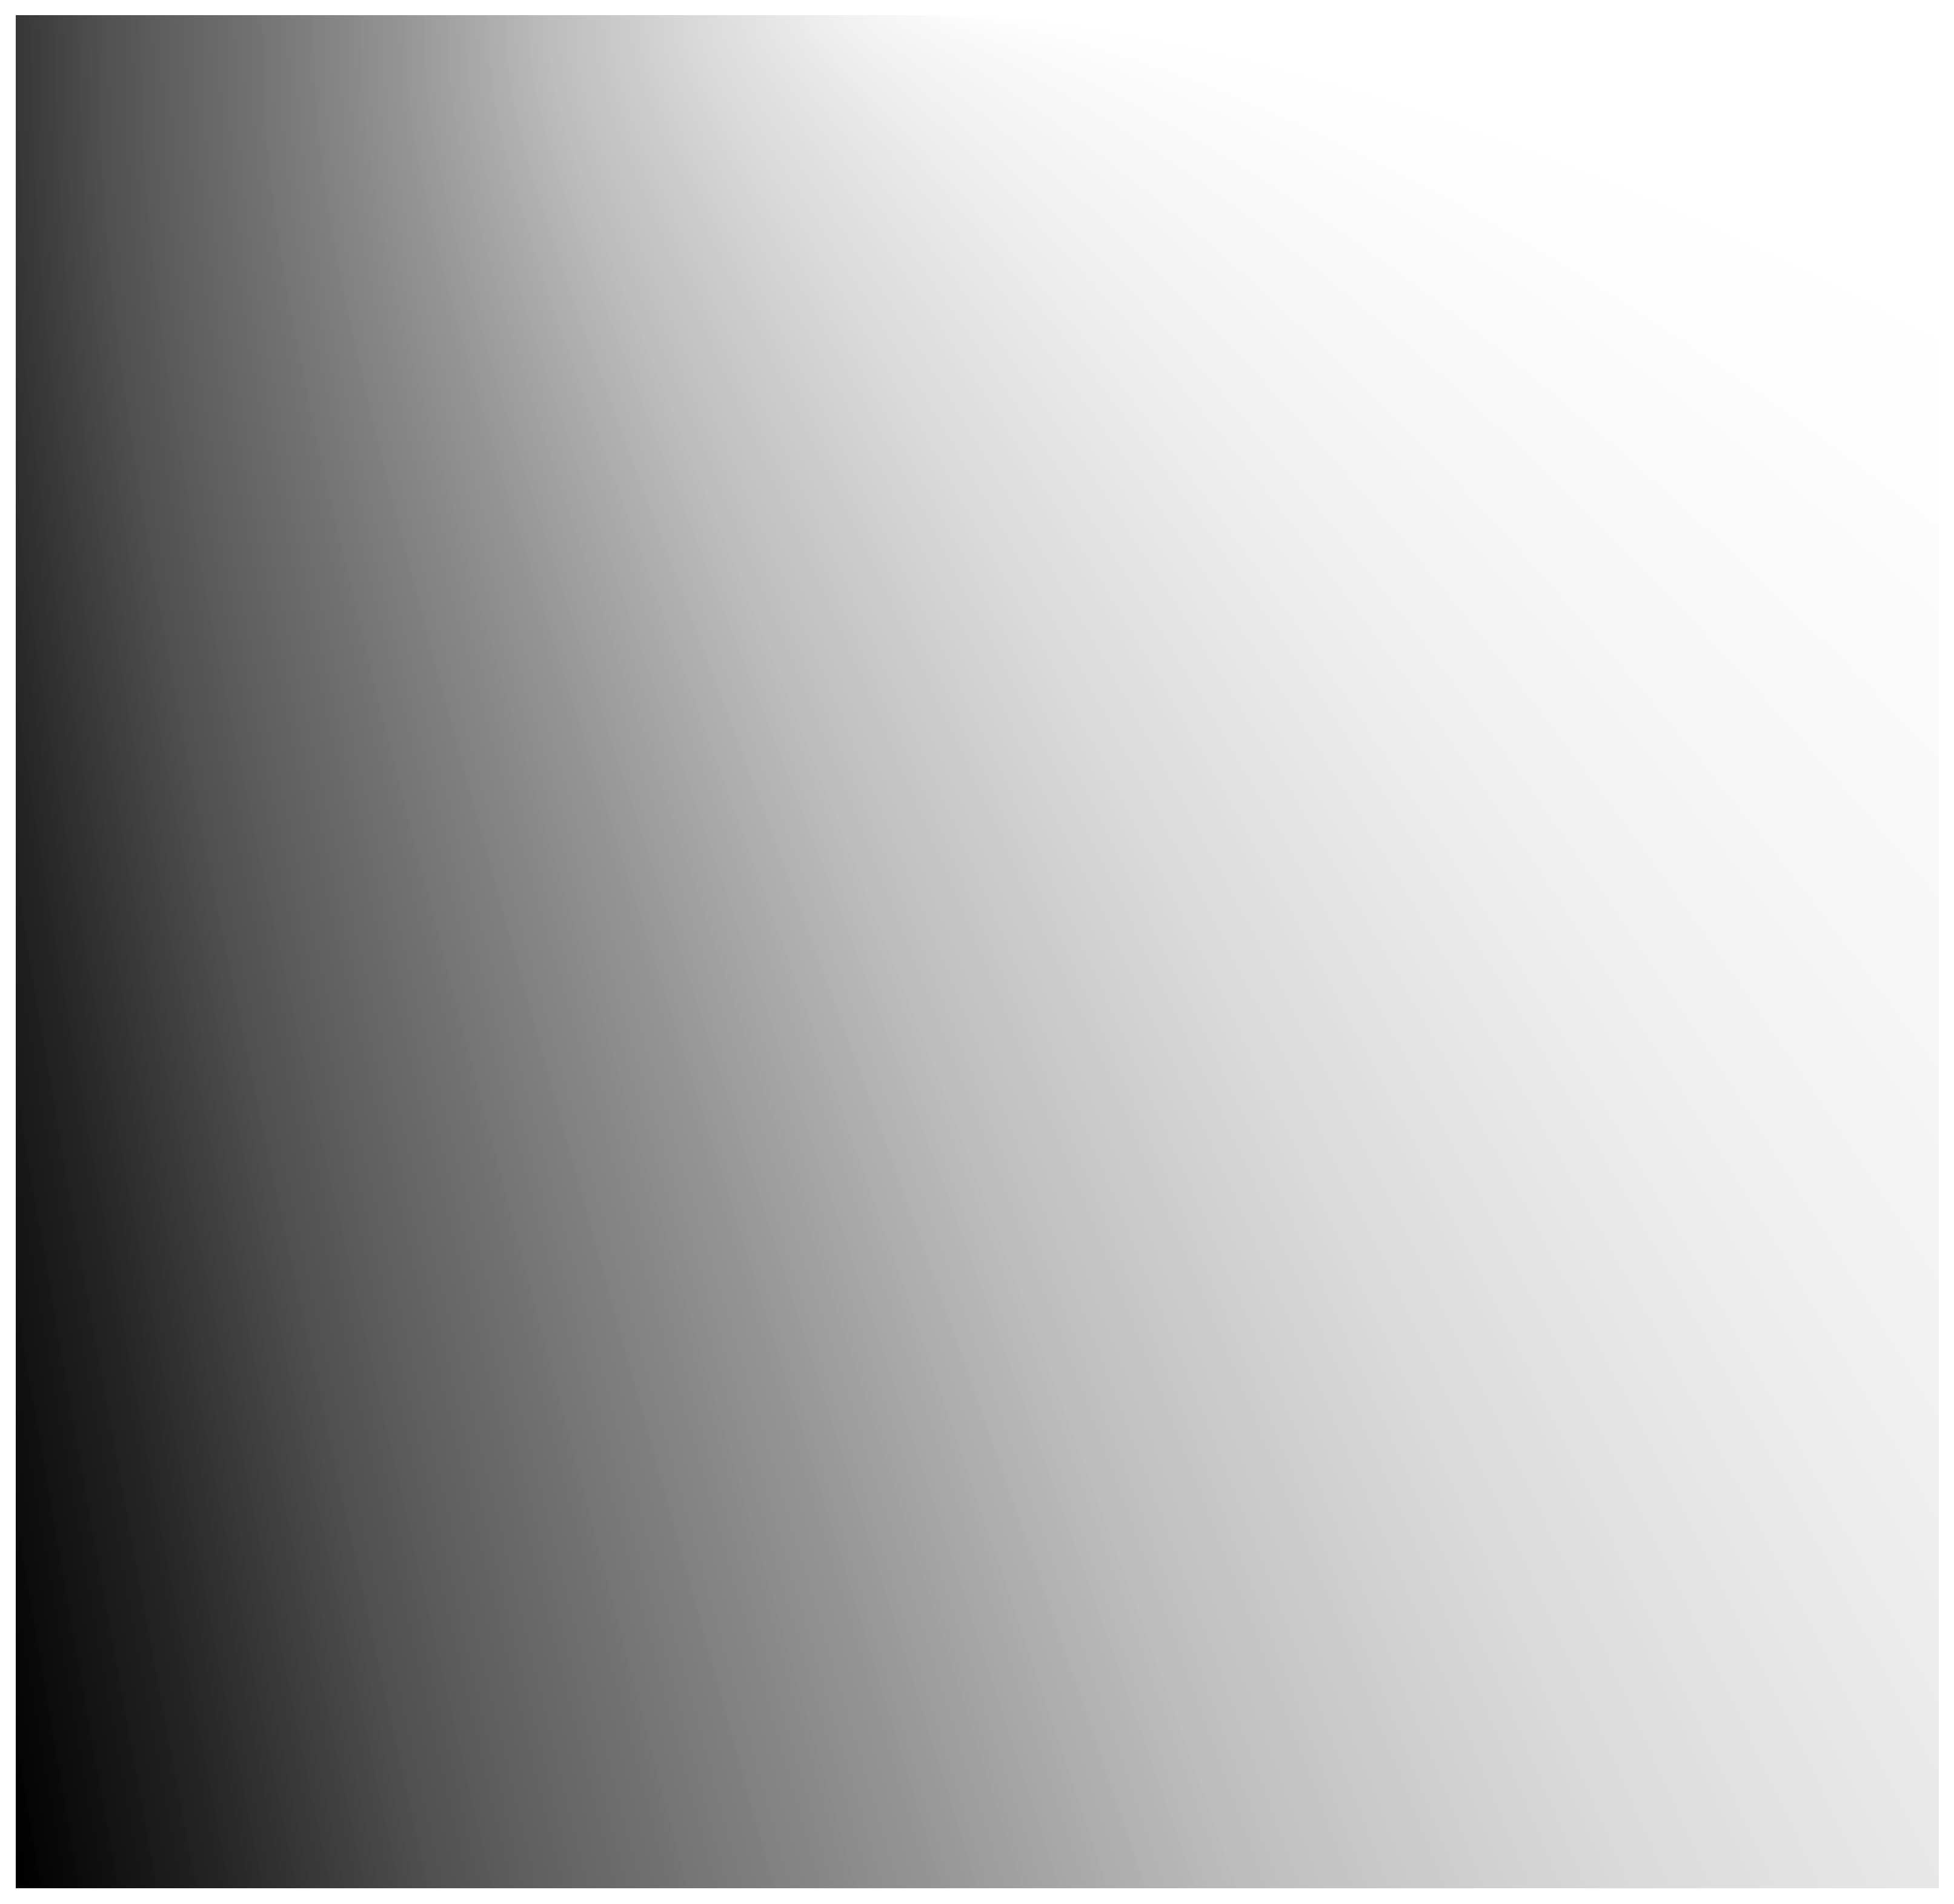

In [5]:
n = 2000
moneyness = linspace(-0.1, 0.1, n)
K = S*exp(moneyness)
Ts = linspace(1e-9, 0.5, n)

fv = array([BSM(S, K, T, sig, r, q).calc_fair_value() for T in Ts])

xl = [m if abs(m%0.05)<1e-3 else None for m in moneyness]
yl = [round(T,2) if abs(T%0.25)<1e-9 else None for T in Ts]

plt.figure(dpi=256)
hm = sns.heatmap(fv, cmap=plt.get_cmap("Greys"), xticklabels=False, 
                 yticklabels=False, cbar=False)

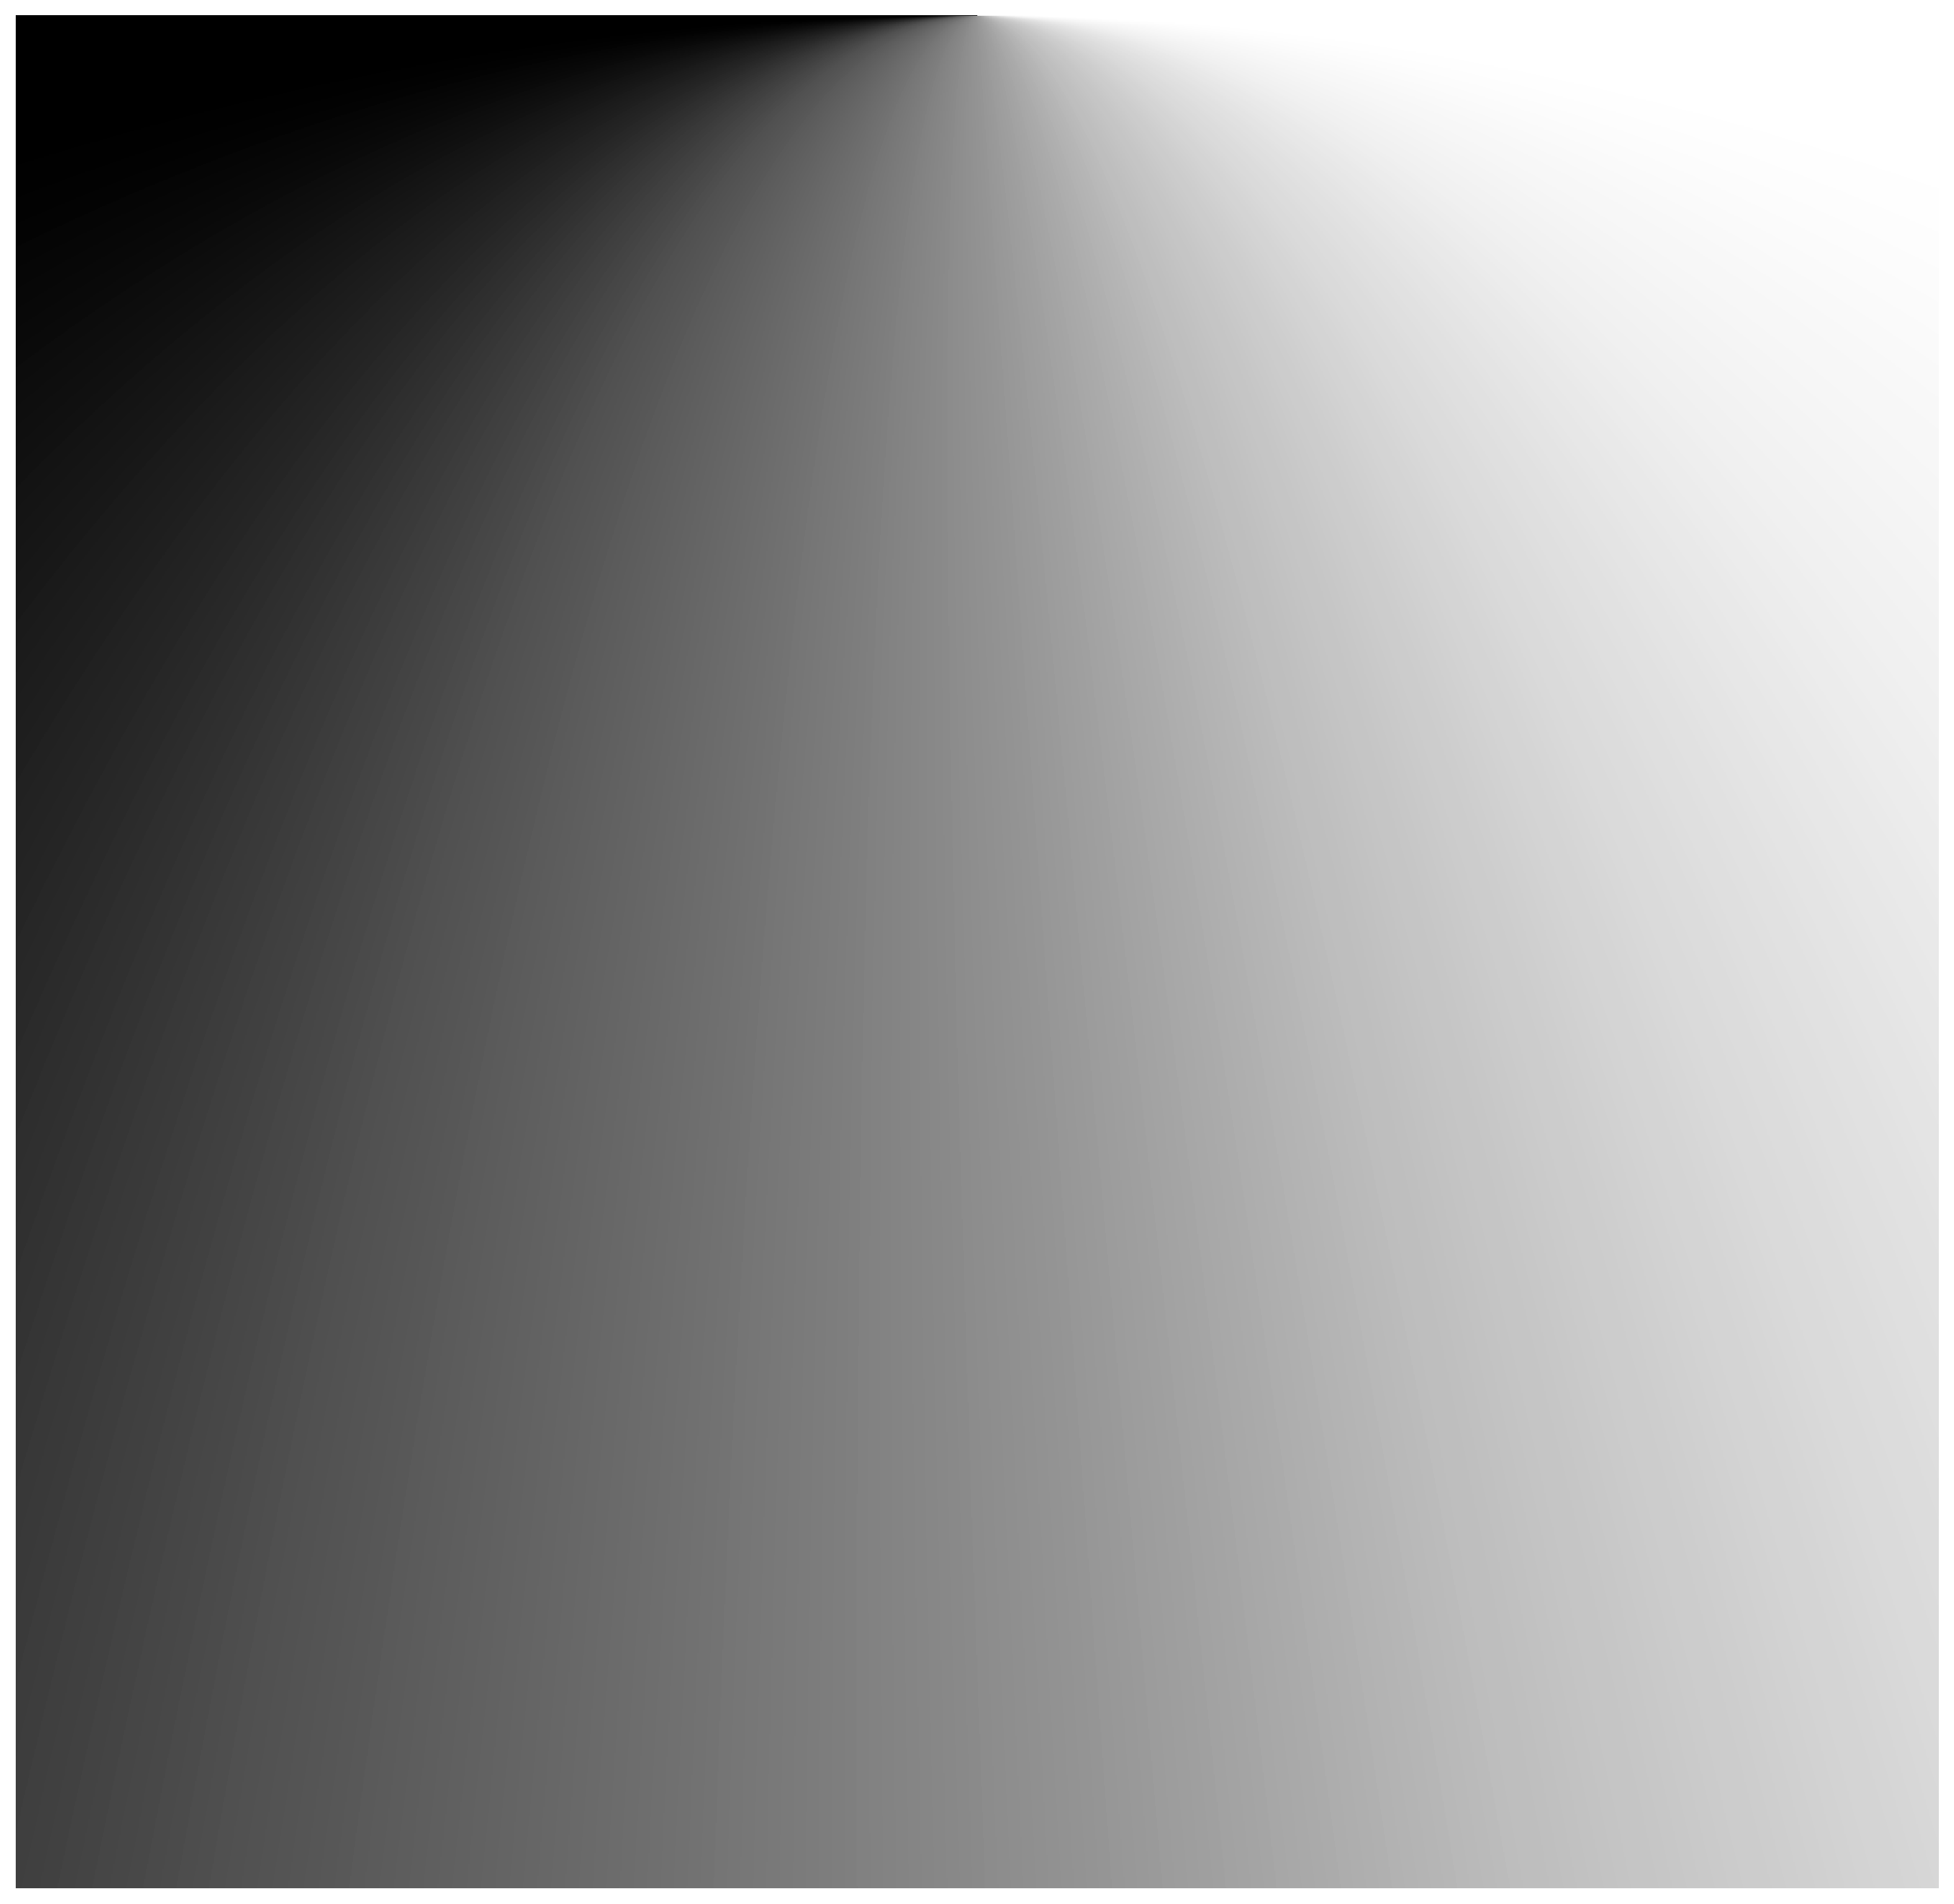

In [6]:
n = 2000
moneyness = linspace(-0.1, 0.1, n)
K = S*exp(moneyness)
Ts = linspace(1e-9, 0.5, n)

delta = array([BSM(S, K, T, sig, r, q).calc_delta() for T in Ts])

xl = [m if abs(m%0.05)<1e-6 else None for m in moneyness]
yl = [round(T,2) if abs(T%0.25)<1e-9 else None for T in Ts]

plt.figure(dpi=256)
hm = sns.heatmap(delta, cmap=plt.get_cmap("Greys"), xticklabels=False, 
                 yticklabels=False, cbar=False)

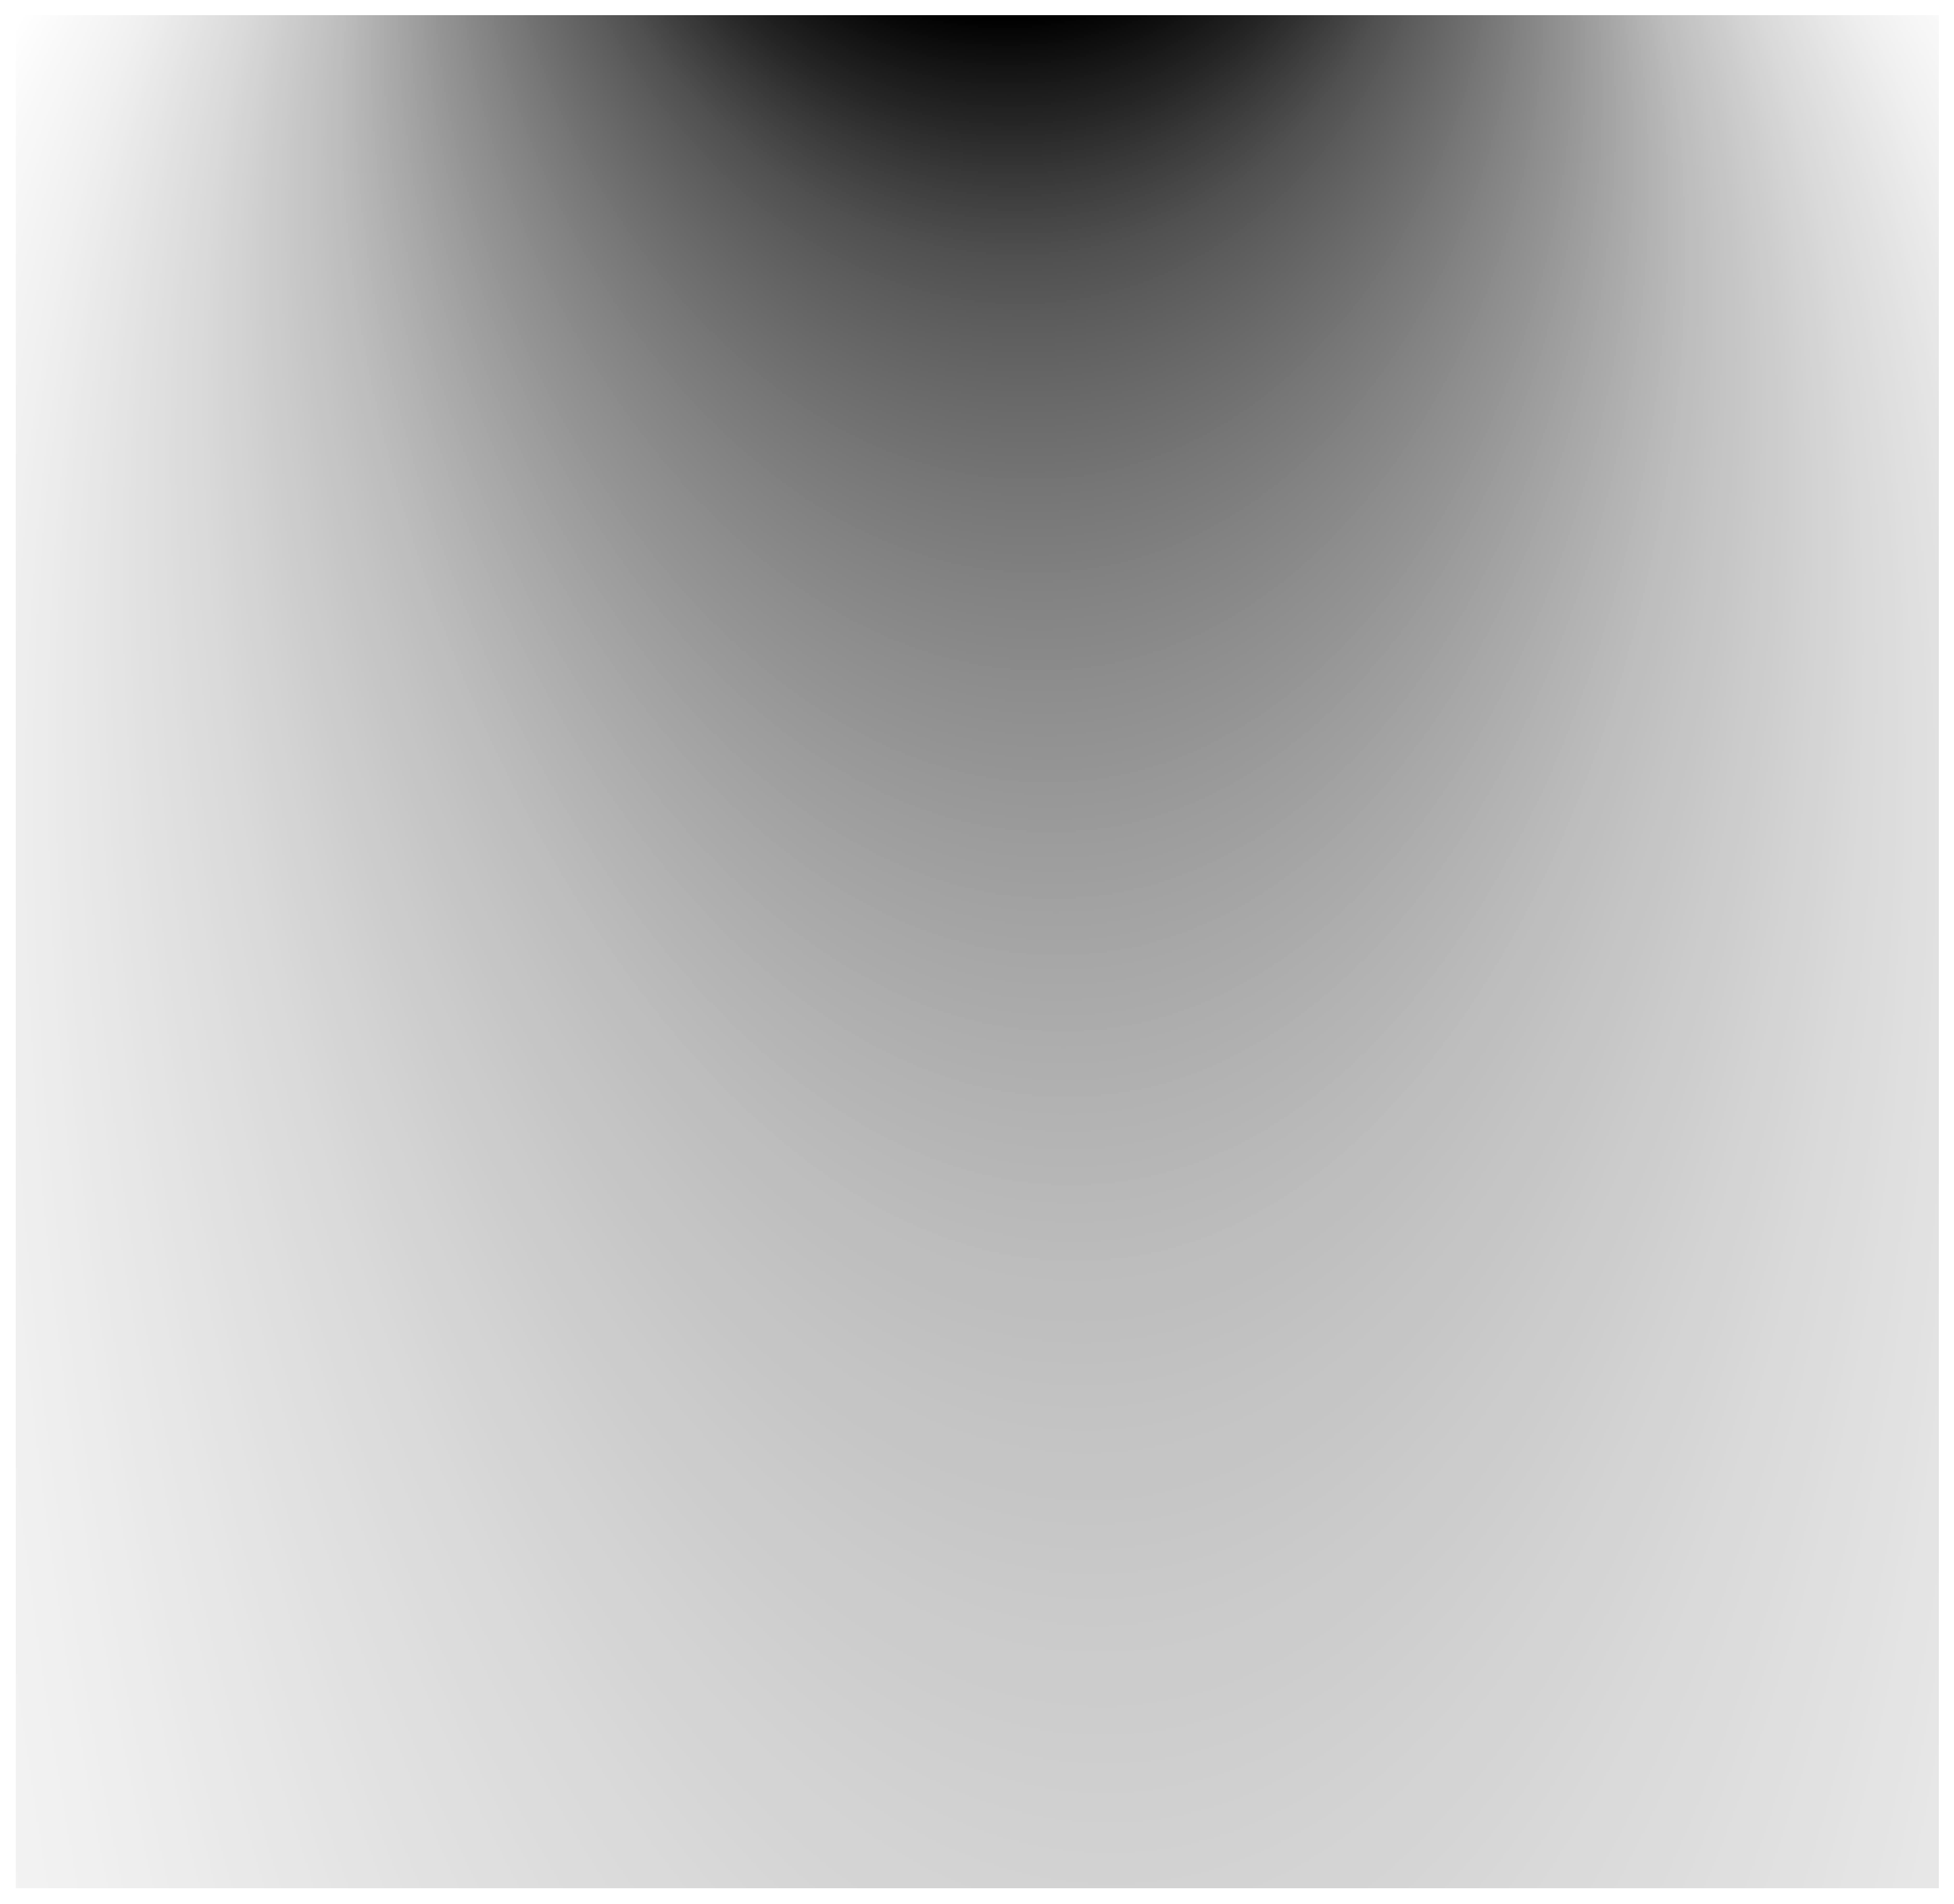

In [7]:
n = 1001
moneyness = linspace(-0.1, 0.1, n)
K = S*exp(moneyness)
Ts = linspace(1e-1, 0.5, n-100)

gamma = array([BSM(S, K, T, sig, r, q).calc_gamma() for T in Ts])

xl = [m if abs(m%0.05)<1e-6 else None for m in moneyness]
yl = [round(T,2) if abs(T%0.25)<1e-9 else None for T in Ts]

plt.figure(dpi=256)
hm = sns.heatmap(gamma, cmap=plt.get_cmap("Greys"), xticklabels=False, 
                 yticklabels=False, cbar=False)

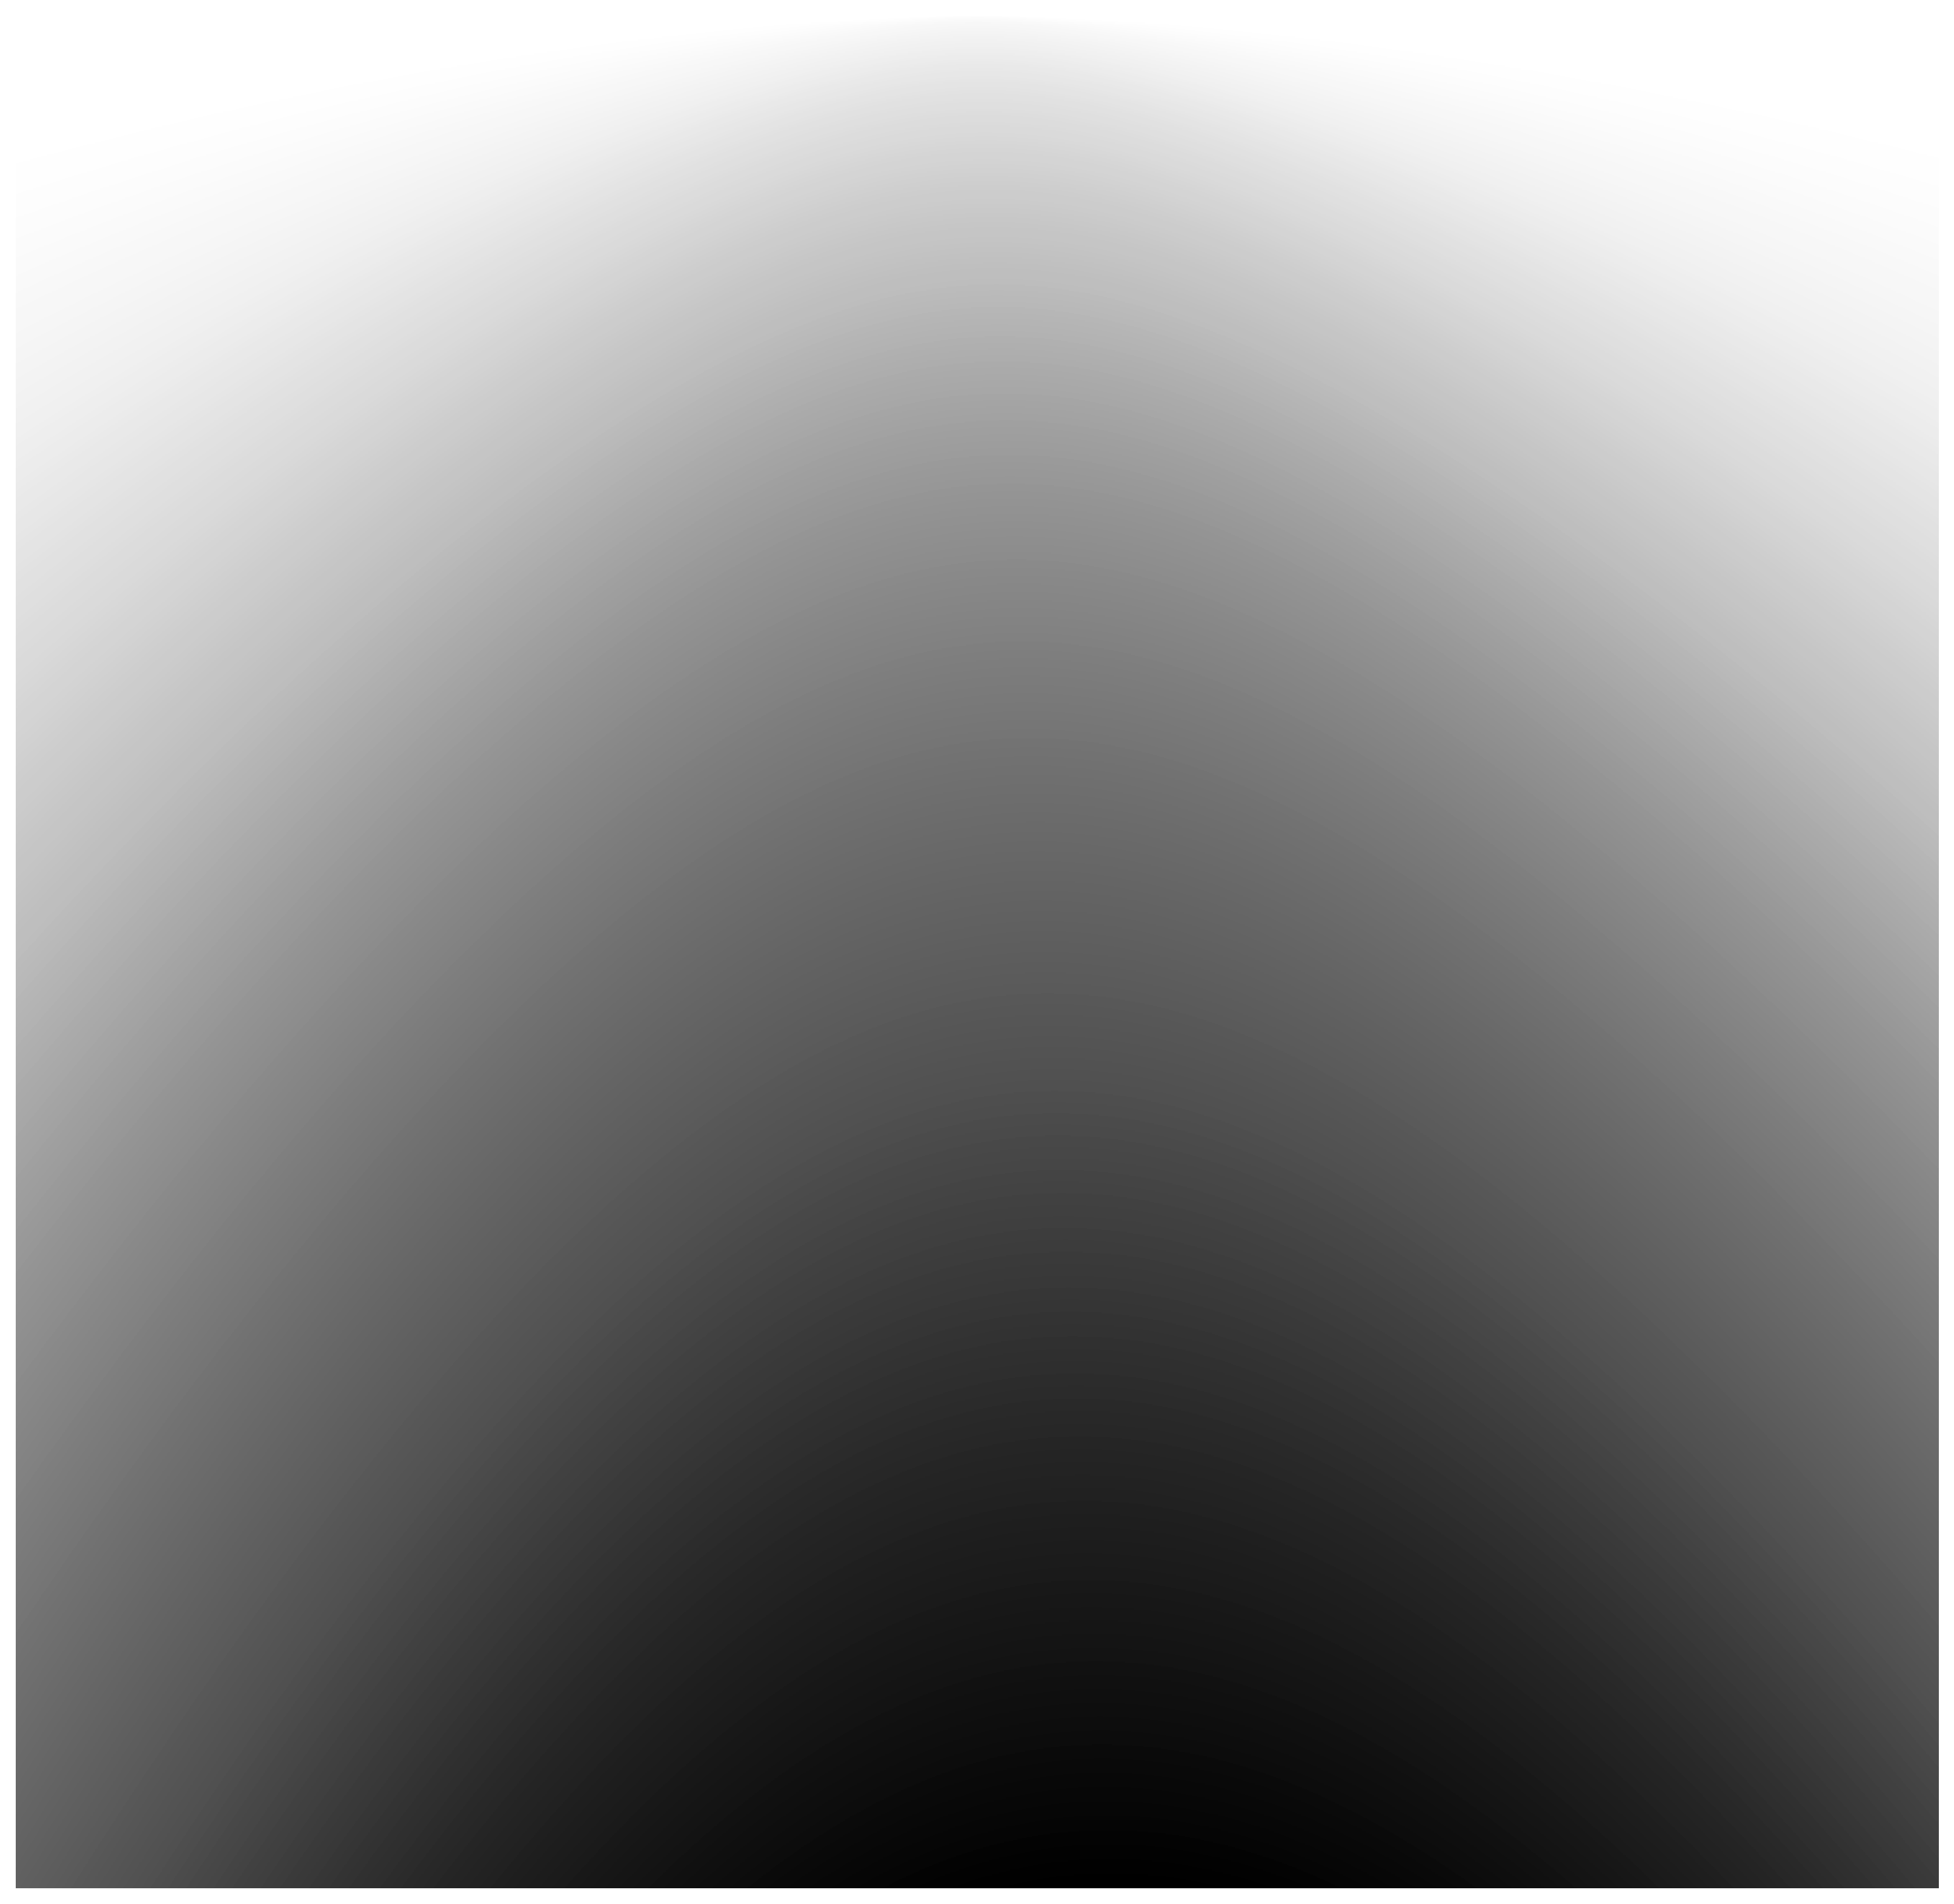

In [8]:
n = 2000
moneyness = linspace(-0.1, 0.1, n)
K = S*exp(moneyness)
Ts = linspace(1e-9, 0.5, n)

vega = array([BSM(S, K, T, sig, r, q).calc_vega() for T in Ts]) / 100

xl = [m if abs(m%0.05)<1e-6 else None for m in moneyness]
yl = [round(T,2) if abs(T%0.25)<1e-9 else None for T in Ts]

plt.figure(dpi=256)
hm = sns.heatmap(vega, cmap=plt.get_cmap("Greys"), xticklabels=False, 
                 yticklabels=False, cbar=False)

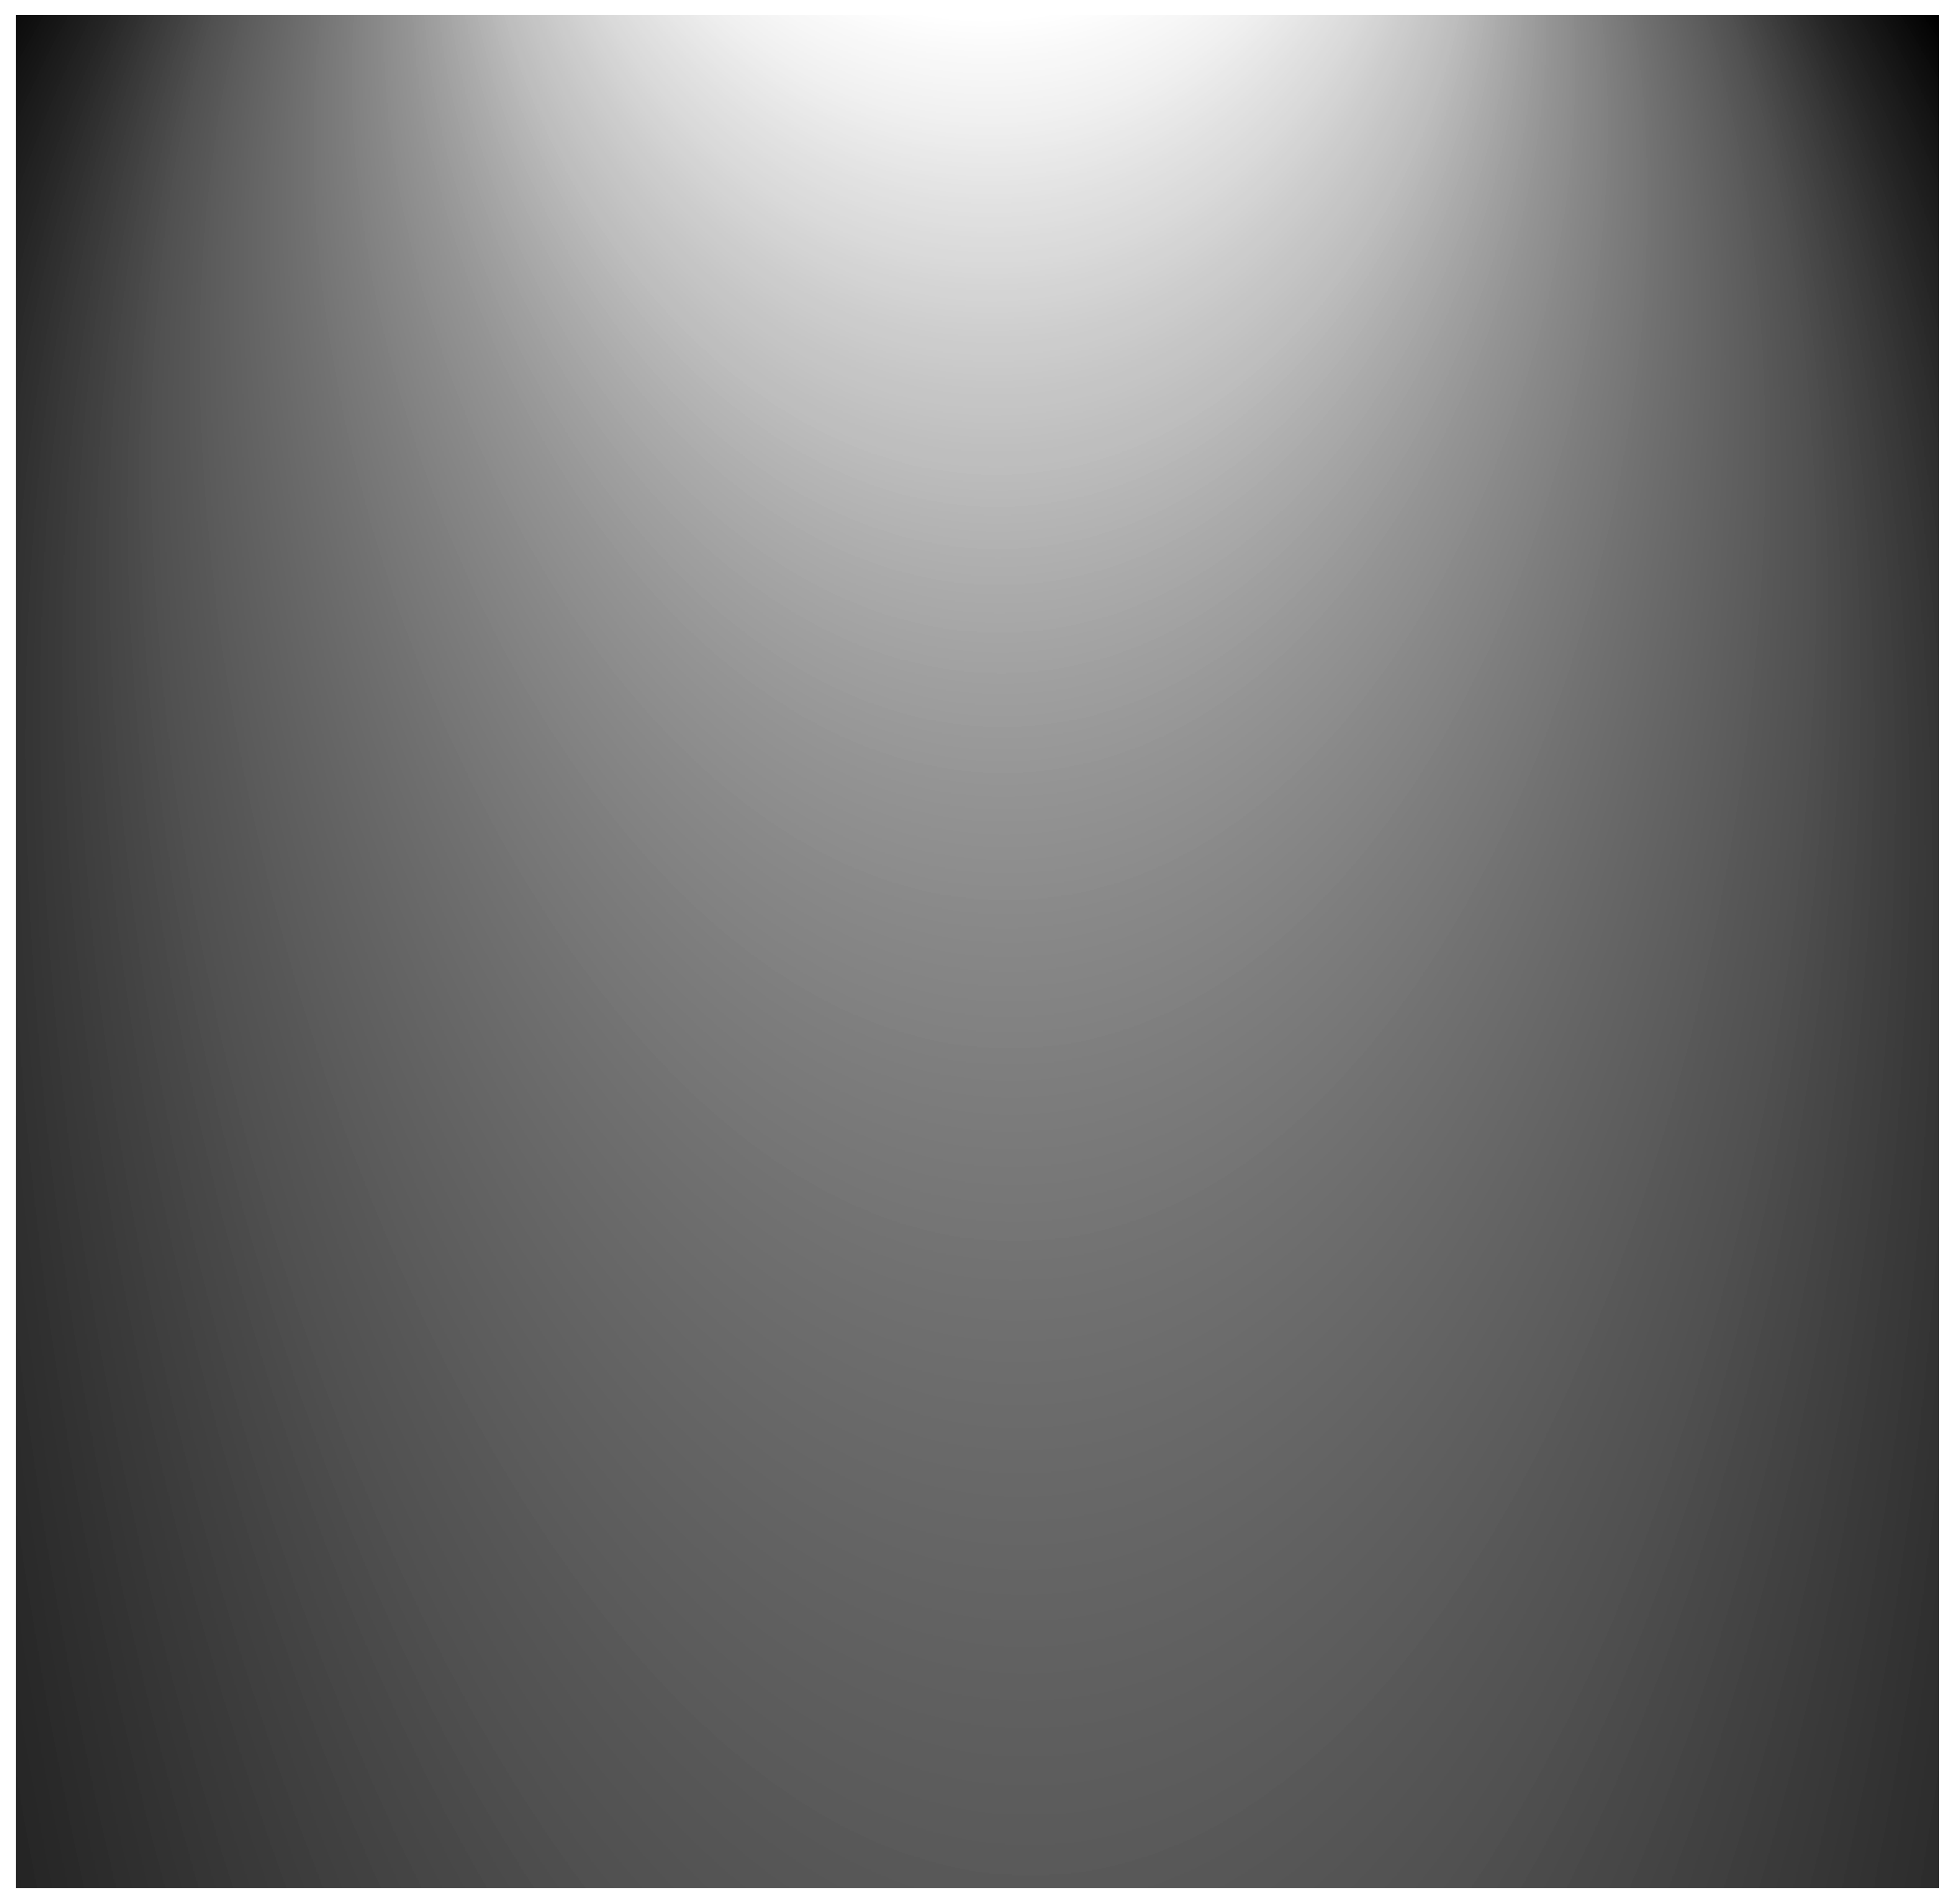

In [9]:
n = 2000
moneyness = linspace(-0.1, 0.1, n)
K = S*exp(moneyness)
Ts = linspace(1e-1, 0.5, n)

theta = array([BSM(S, K, T, sig, r, q).calc_theta() for T in Ts]) / 252

xl = [m if abs(m%0.05)<1e-6 else None for m in moneyness]
yl = [round(T,2) if abs(T%0.25)<1e-9 else None for T in Ts]

plt.figure(dpi=256)
hm = sns.heatmap(theta, cmap=plt.get_cmap("Greys"), xticklabels=False, 
                 yticklabels=False, cbar=False)